In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [41]:
df=pd.read_csv('train.csv')
dfx=pd.read_csv('test.csv')
len(df)
df=df[df.Item_MRP>df.Item_MRP.mean()-2*df.Item_MRP.std()]
df=df[df.Item_MRP<df.Item_MRP.mean()+2*df.Item_MRP.std()]
len(df)
df=pd.concat([df,dfx])
len(df)
#df.Item_Weight.value_counts()

14190

In [4]:
df.Item_Identifier=df.Item_Identifier.apply(lambda x: x[:2] )
df.Item_Identifier.value_counts()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2437
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4012
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [6]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
len(df.Item_Type.unique())

16

In [8]:
x=pd.get_dummies(df.Item_Identifier)
x=x.drop(['DR'],axis=1)
df1=pd.concat([df,x],axis=1)
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,FD,NC
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1,0
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,1


In [9]:
df1.Item_Weight=df1.Item_Weight.fillna(df1.Item_Weight.mean())

In [10]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].apply(lambda x: 1 if x=='Regular' or x=='reg'  else 0)

In [11]:
x=pd.get_dummies(df1.Outlet_Identifier)
x=x.drop(['OUT049'],axis=1)
df0=pd.concat([df1,x],axis=1)
df0.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,NC,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046
0,FD,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,0
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0,0,0,0,1,0,0,0,0,0
2,FD,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,0
3,FD,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,...,0,1,0,0,0,0,0,0,0,0
4,NC,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,1,0,1,0,0,0,0,0,0,0


In [12]:
x=pd.get_dummies(df1.Item_Type)
x=x.drop(['Breads'],axis=1)
df2=pd.concat([df0,x],axis=1)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FD,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,0,0,0
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0,0,0,0,0,0,0,0,1,0
2,FD,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0,0,0,0,1,0,0,0,0,0
3,FD,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,...,1,0,0,0,0,0,0,0,0,0
4,NC,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0,0,0,1,0,0,0,0,0,0


In [13]:
df2.Outlet_Size.value_counts()

Medium    4653
Small     3974
High      1551
Name: Outlet_Size, dtype: int64

In [14]:
df2.Outlet_Size=df2.Outlet_Size.apply(lambda x: 2 if x=='Medium' else x)
df2.Outlet_Size=df2.Outlet_Size.apply(lambda x: 1 if x=='Small' else x)
df2.Outlet_Size=df2.Outlet_Size.apply(lambda x: 3 if x=='High' else x)
df2.Outlet_Size=df2.Outlet_Size.fillna(df2.Outlet_Size.mean())
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FD,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,2.000000,Tier 1,...,0,0,0,0,0,0,0,0,0,0
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2.000000,Tier 3,...,0,0,0,0,0,0,0,0,1,0
2,FD,17.50,0,0.016760,Meat,141.6180,OUT049,1999,2.000000,Tier 1,...,0,0,0,0,1,0,0,0,0,0
3,FD,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.761938,Tier 3,...,1,0,0,0,0,0,0,0,0,0
4,NC,8.93,0,0.000000,Household,53.8614,OUT013,1987,3.000000,Tier 3,...,0,0,0,1,0,0,0,0,0,0


In [15]:
df2.Outlet_Location_Type.value_counts()

Tier 3    5580
Tier 2    4636
Tier 1    3974
Name: Outlet_Location_Type, dtype: int64

In [16]:
df2.Outlet_Location_Type=df2.Outlet_Location_Type.apply(lambda x: 2 if x=='Tier 2' else x)
df2.Outlet_Location_Type=df2.Outlet_Location_Type.apply(lambda x: 3 if x=='Tier 1' else x)
df2.Outlet_Location_Type=df2.Outlet_Location_Type.apply(lambda x: 1 if x=='Tier 3' else x)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FD,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,2.000000,3,...,0,0,0,0,0,0,0,0,0,0
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2.000000,1,...,0,0,0,0,0,0,0,0,1,0
2,FD,17.50,0,0.016760,Meat,141.6180,OUT049,1999,2.000000,3,...,0,0,0,0,1,0,0,0,0,0
3,FD,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.761938,1,...,1,0,0,0,0,0,0,0,0,0
4,NC,8.93,0,0.000000,Household,53.8614,OUT013,1987,3.000000,1,...,0,0,0,1,0,0,0,0,0,0


In [17]:
df.Outlet_Type.value_counts()

Supermarket Type1    9283
Grocery Store        1802
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [18]:
df2.Outlet_Type=df2.Outlet_Type.apply(lambda x: 1 if x=='Grocery Store' else x)
df2.Outlet_Type=df2.Outlet_Type.apply(lambda x: 2 if x=='Supermarket Type3' else x)
df2.Outlet_Type=df2.Outlet_Type.apply(lambda x: 3 if x=='Supermarket Type2' else x)
df2.Outlet_Type=df2.Outlet_Type.apply(lambda x: 4 if x=='Supermarket Type1' else x)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FD,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,2.000000,3,...,0,0,0,0,0,0,0,0,0,0
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2.000000,1,...,0,0,0,0,0,0,0,0,1,0
2,FD,17.50,0,0.016760,Meat,141.6180,OUT049,1999,2.000000,3,...,0,0,0,0,1,0,0,0,0,0
3,FD,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.761938,1,...,1,0,0,0,0,0,0,0,0,0
4,NC,8.93,0,0.000000,Household,53.8614,OUT013,1987,3.000000,1,...,0,0,0,1,0,0,0,0,0,0


In [19]:
X1=df2.drop(['Item_Outlet_Sales','Item_Type','Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'],axis=1)
X1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,FD,NC,OUT010,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,249.8092,2.000000,3,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,2.000000,1,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,2.000000,3,4,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1.761938,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,3.000000,1,4,0,1,0,...,0,0,0,1,0,0,0,0,0,0


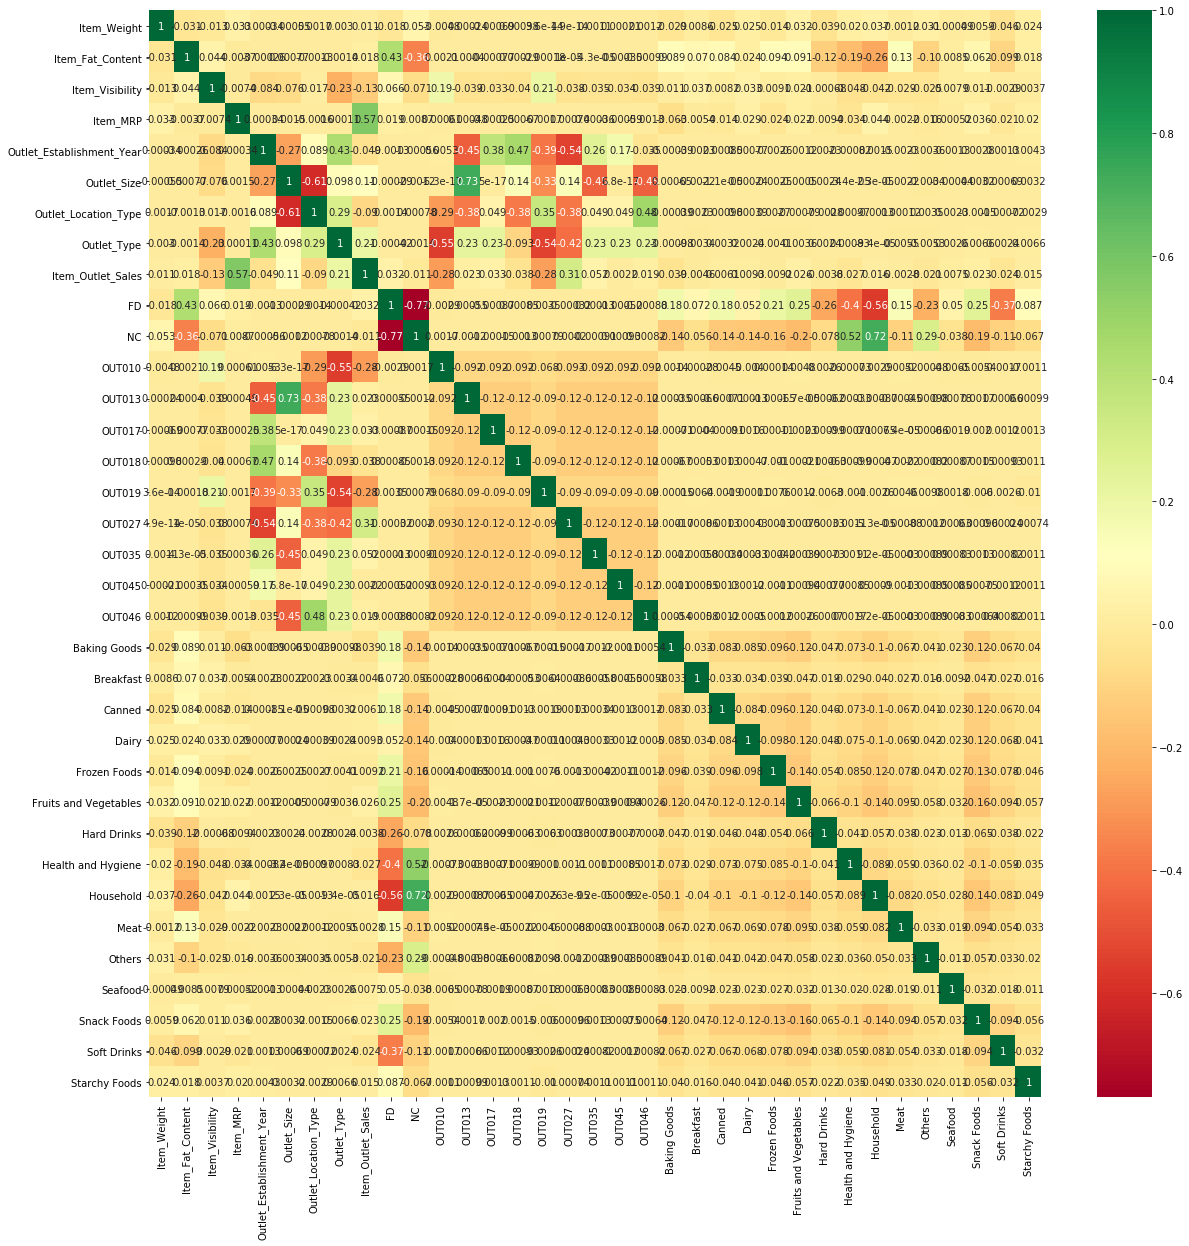

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
X = df2.iloc[:,0:20]  #independent columns
y = df2.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
 from sklearn.preprocessing import PolynomialFeatures

In [33]:
X1=df2[['Item_MRP','Outlet_Type','Item_Weight','OUT027','OUT019','OUT010']]
poly = PolynomialFeatures(interaction_only=True,degree=2)
X1=poly.fit_transform(X1)
X1 = pd.DataFrame(X1)

In [34]:
X2= X1[:8509]

In [35]:
y0=df2['Item_Outlet_Sales']
y=y0[:8509]

In [36]:
X1.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,249.8092,4.0,9.30,0.0,0.0,0.0,999.2368,2323.225560,0.0,...,37.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,48.2692,3.0,5.92,0.0,0.0,0.0,144.8076,285.753664,0.0,...,17.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,141.6180,4.0,17.50,0.0,0.0,0.0,566.4720,2478.315000,0.0,...,70.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,182.0950,1.0,19.20,0.0,0.0,1.0,182.0950,3496.224000,0.0,...,19.20,0.0,0.0,1.0,0.0,0.0,19.2,0.0,0.0,0.0
4,1.0,53.8614,4.0,8.93,0.0,0.0,0.0,215.4456,480.982302,0.0,...,35.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
scaler=StandardScaler()
X1[1]=scaler.fit_transform(X1[[1]])
X1[7]=scaler.fit_transform(X1[[7]])
X1[8]=scaler.fit_transform(X1[[8]])
X1[11]=scaler.fit_transform(X1[[11]])
X1[12]=scaler.fit_transform(X1[[12]])





#X1[4]=scaler.fit_transform(X1[[4]])

#X1['Item_Weight']=scaler.fit_transform(X1[['Item_Weight']])
#X1['Outlet_Location_Type']=scaler.fit_transform(X1[['Outlet_Location_Type']])
#X3['Outlet_Size']=scaler.fit_transform(X3[['Outlet_Size']])
#X3['Outlet_Type']=scaler.fit_transform(X3[['Outlet_Type']])

In [38]:
X2.head()

X1.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,1.757170,4.0,9.30,0.0,0.0,0.0,2.027479,0.492020,0.0,...,-0.232733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-1.493974,3.0,5.92,0.0,0.0,0.0,-1.206418,-1.463935,0.0,...,-1.155482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.011883,4.0,17.50,0.0,0.0,0.0,0.389524,0.640905,0.0,...,1.324168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.664838,1.0,19.20,0.0,0.0,1.0,-1.065290,1.618088,0.0,...,-1.087130,0.0,0.0,1.0,0.0,0.0,19.2,0.0,0.0,0.0
4,1.0,-1.403764,4.0,8.93,0.0,0.0,0.0,-0.939063,-1.276517,0.0,...,-0.302983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [427]:
from sklearn import model_selection ,metrics

predictors = ['Item_MRP','Outlet_Type']
alg4 = Lasso(alpha= 2, selection= 'cyclic')
cv_score=model_selection.cross_val_score(alg4,X2,y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
np.mean(cv_score)

1071.696946774873

In [426]:

from sklearn import model_selection ,metrics

predictors = ['Item_MRP','Outlet_Type']
alg4 = LinearRegression()
cv_score=model_selection.cross_val_score(alg4,X2,y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
np.mean(cv_score)

1072.06021533866

In [405]:

from sklearn import model_selection ,metrics

predictors = ['Item_MRP','Outlet_Type']
alg4 = SVR()
cv_score=model_selection.cross_val_score(alg4,X2,y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
np.mean(cv_score)

1696.259289191329

In [428]:
Xtex=X1[8509:]
alg4.fit(X2,y)
ans=alg4.predict(Xtex)
ans

array([1752.61823013, 1427.53616916,  615.30888908, ..., 1947.81252961,
       3535.06819302, 1300.83790943])

In [429]:
xx=pd.read_csv('sample_sub.csv')
xx.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1765.022698
1,FDW14,OUT017,1424.676041
2,NCN55,OUT010,602.295774
3,FDQ58,OUT017,2546.565478
4,FDY38,OUT027,6109.641112


In [430]:
xx['Item_Outlet_Sales']=ans

In [431]:
xx.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1752.618230
1,FDW14,OUT017,1427.536169
2,NCN55,OUT010,615.308889
3,FDQ58,OUT017,2554.810902
4,FDY38,OUT027,6090.780447


In [432]:
xx.to_csv('sample_sub.csv',index=False)